<a href="https://colab.research.google.com/github/biacandiani/aulas_biorreatores/blob/main/monod_com_kd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equação de Monod com Taxa de morte celular

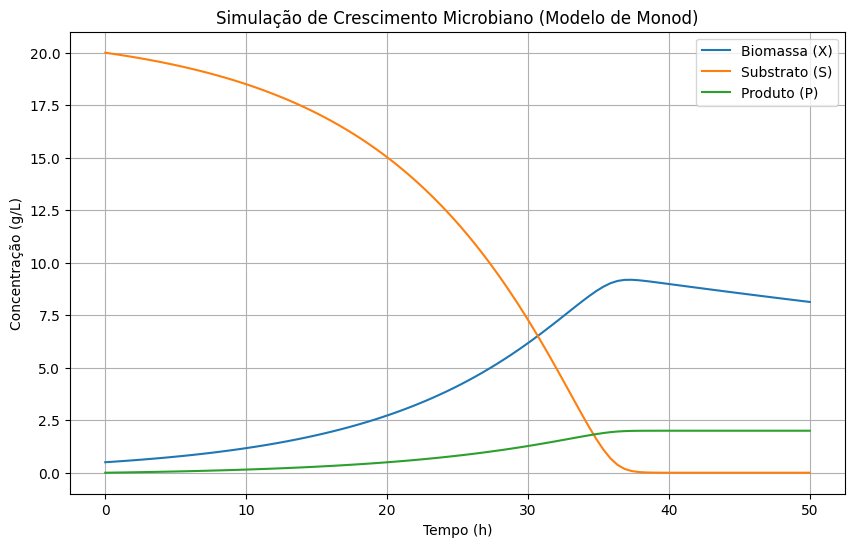

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parâmetros do Modelo de Monod
mumax = 0.1  # Taxa máxima específica de crescimento (h^-1)
Ks = 1  # Constante de saturação (g/L)
Yxs = 0.5  # Coeficiente de rendimento de biomassa/substrato (g/g)
Ypx = 0.2  # Coeficiente de rendimento de produto/biomassa (g/g)
alfa = 0.35 # Coeficiente de formação de produto associado ao crescimento
kd = 0.01 # Taxa de morte celular


# Condições Iniciais
X0 = 0.5  # Concentração inicial de biomassa (g/L)
S0 = 20.0  # Concentração inicial de substrato (g/L)
P0 = 0.0  # Concentração inicial de produto (g/L)

# Tempo de Simulação
tempo_inicial = 0
tempo_final = 50  # Tempo total de simulação (horas)

# Inicialização dos vetores para armazenar os resultados
X = [X0]
S = [S0]
P = [P0]

# Função que define as equações diferenciais
def modelo(y, t, mumax, Ks, Yxs, Ypx, kd):
    X, S, P = y
    mu = mumax * (S / (Ks + S))
    dXdt = mu * X - kd * X
    dSdt = -(1 / Yxs) * mu * X
    dPdt = Ypx * mu * X  # Exemplo: produto associado
    return [dXdt, dSdt, dPdt]


# Tempo de simulação
tempo = np.linspace(tempo_inicial, tempo_final, 100) # Usar linspace para odeint

# Resolver as equações com odeint
solucao = odeint(modelo, [X0, S0, P0], tempo, args=(mumax, Ks, Yxs, Ypx, kd))

# Extrair os resultados
X = solucao[:, 0]  # Todas as linhas, primeira coluna (X)
S = solucao[:, 1]
P = solucao[:, 2]

# Plotagem dos Resultados
plt.figure(figsize=(10, 6))
plt.plot(tempo, X, label='Biomassa (X)')
plt.plot(tempo, S, label='Substrato (S)')
plt.plot(tempo, P, label='Produto (P)')
plt.xlabel('Tempo (h)')
plt.ylabel('Concentração (g/L)')
plt.title('Simulação de Crescimento Microbiano (Modelo de Monod)')
plt.legend()
plt.grid(True)
plt.show()